In [1]:
def get_beta_cyclical(epoch, total_epochs, n_cycles=4, beta_max=0.01):
    cycle_len = total_epochs // n_cycles
    relative_epoch = epoch % cycle_len
    # 각 사이클의 전반부 50% 동안만 선형적으로 증가
    beta = min(beta_max, (relative_epoch / (cycle_len * 0.5)) * beta_max)
    return beta

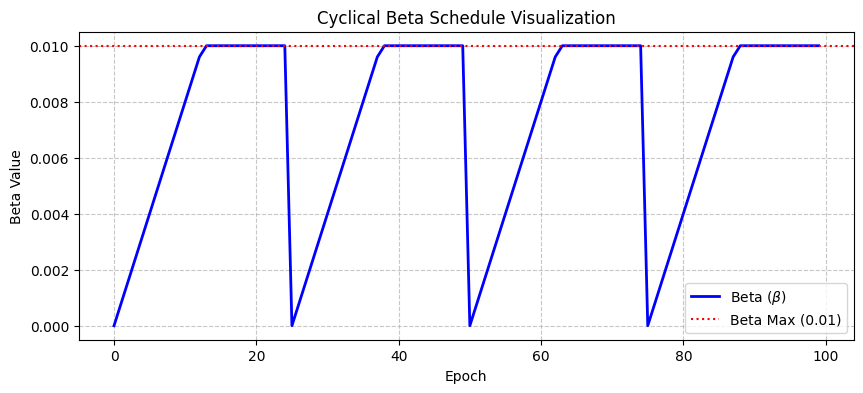

In [4]:
# 2. 시뮬레이션 설정
import numpy as np
import matplotlib.pyplot as plt
total_epochs = 100
epochs = np.arange(total_epochs)
beta_values = [get_beta_cyclical(e, total_epochs) for e in epochs]

# 3. 시각화
plt.figure(figsize=(10, 4))
plt.plot(epochs, beta_values, label='Beta ($\\beta$)', color='blue', linewidth=2)
plt.title('Cyclical Beta Schedule Visualization')
plt.xlabel('Epoch')
plt.ylabel('Beta Value')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0.01, color='r', linestyle=':', label='Beta Max (0.01)')
plt.legend()
plt.show()

In [3]:
import torch
from model.basic_vae_1 import MultiDecoderCondVAE
train_loader=  torch.load('torch/train_loader.pt',weights_only=False)
x_sample, c_sample = next(iter(train_loader))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultiDecoderCondVAE(x_dim=x_sample.shape[1], c_dim=c_sample.shape[1]).to(device)
for x,c in train_loader:
    x = x.to(device)
    c = c.to(device)
    m_logits,r_num,mu,logvar = model(x,c)
m_logits.max()

tensor(0.3416, device='cuda:0', grad_fn=<MaxBackward1>)